CF


In [1]:
gejala_user = {
    "demam": 0.2,
    "batuk": 0.5,
    "sakit_tenggorokan": 0.6,
    "pilek": 0.7,
    "nyeri_otot": 0.4,
    "lemas": 0.6,
    "sakit_kepala": 0.5,
    "mual": 0.3
}

pengetahuan = {
    "flu": {
        "demam": 0.8,
        "batuk": 0.7,
        "sakit_tenggorokan": 0.6,
        "pilek": 0.9,
        "nyeri_otot": 0.6,
        "lemas": 0.7,
        "sakit_kepala": 0.6,
        "mual": 0.5
    }
}

def hitung_cf(gejala_user, pengetahuan_pakar):
    cf_total = 0
    first = True
    for gejala, cf_user in gejala_user.items():
        if gejala in pengetahuan_pakar:
            cf_pakar = pengetahuan_pakar[gejala]
            cf = cf_user * cf_pakar
            if first:
                cf_total = cf
                first = False
            else:
                cf_total = cf_total + cf * (1 - cf_total)
    return cf_total

cf_flu = hitung_cf(gejala_user, pengetahuan["flu"])
print(f"CF diagnosis Flu: {cf_flu:.2f}")


CF diagnosis Flu: 0.97


tambah 5 gejala baru dan ubah nilai CF

Penjelasan kode :
## Analisis Perubahan CF Gejala

1. Penambahan Gejala:
   - Ditambahkan 5 gejala baru: `pilek`, `nyeri_otot`, `lemas`, `sakit_kepala`, `mual`.
   - Masing-masing diberikan nilai CF berdasarkan dugaan tingkat keyakinan user terhadap gejala tersebut.

2. Perubahan CF Gejala "demam":
   - Awalnya `demam` memiliki nilai CF 0.7 → diturunkan menjadi 0.2.
   - Karena "demam" memiliki bobot tinggi di basis pengetahuan (`cf_pakar = 0.8`), penurunan nilai ini menyebabkan hasil total `cf_flu` juga menurun.

3. Hasil Diagnosis:
   - Meskipun "demam" melemah, gejala tambahan seperti `pilek`, `lemas`, dan `nyeri otot` memperkuat nilai diagnosis flu.
   - Nilai akhir `CF diagnosis Flu` mencerminkan hasil kombinasi dari seluruh gejala yang dikenali.

4. Kesimpulan:
   - Semakin tinggi CF gejala yang sesuai dengan pakar, maka semakin tinggi kemungkinan diagnosis.
   - Perubahan kecil pada satu gejala bisa berdampak besar jika gejala tersebut memiliki kontribusi signifikan dalam basis pengetahuan.


Fuzzy Logic

In [2]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.5 MB/s eta 0:00:00


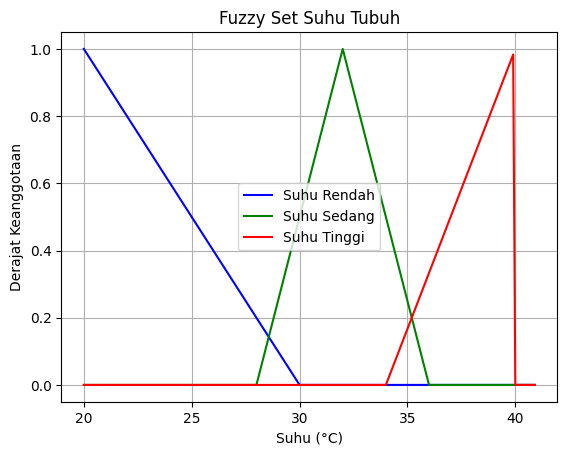

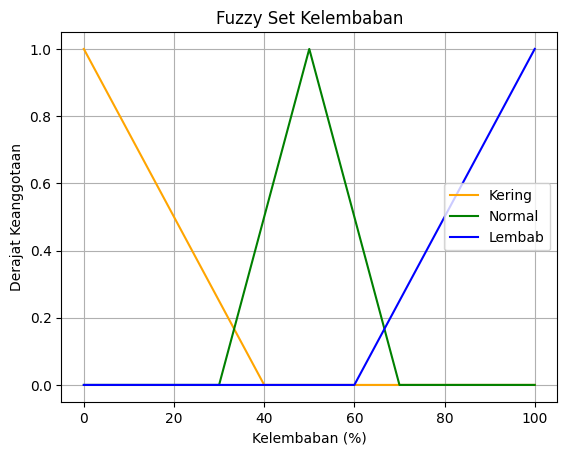

Input Suhu: 22.0°C
 - Rendah: 0.80
 - Sedang: 0.00
 - Tinggi: 0.00

Input Kelembaban: 85.0%
 - Kering: 0.00
 - Normal: 0.00
 - Lembab: 0.62

Derajat keanggotaan untuk 'kipas lambat': 0.80


In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

suhu = np.arange(20, 41, 0.1)
kelembaban = np.arange(0, 101, 1)

rendah = fuzz.trimf(suhu, [20, 20, 30])
sedang = fuzz.trimf(suhu, [28, 32, 36])
tinggi = fuzz.trimf(suhu, [34, 40, 40])

kering = fuzz.trimf(kelembaban, [0, 0, 40])
normal = fuzz.trimf(kelembaban, [30, 50, 70])
lembab = fuzz.trimf(kelembaban, [60, 100, 100])

plt.figure()
plt.plot(suhu, rendah, 'b', label='Suhu Rendah')
plt.plot(suhu, sedang, 'g', label='Suhu Sedang')
plt.plot(suhu, tinggi, 'r', label='Suhu Tinggi')
plt.title('Fuzzy Set Suhu Tubuh')
plt.xlabel('Suhu (°C)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(kelembaban, kering, 'orange', label='Kering')
plt.plot(kelembaban, normal, 'green', label='Normal')
plt.plot(kelembaban, lembab, 'blue', label='Lembab')
plt.title('Fuzzy Set Kelembaban')
plt.xlabel('Kelembaban (%)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

input_suhu = 22.0
input_kelembaban = 85.0

suhu_rendah = fuzz.interp_membership(suhu, rendah, input_suhu)
suhu_sedang = fuzz.interp_membership(suhu, sedang, input_suhu)
suhu_tinggi = fuzz.interp_membership(suhu, tinggi, input_suhu)

kelembaban_kering = fuzz.interp_membership(kelembaban, kering, input_kelembaban)
kelembaban_normal = fuzz.interp_membership(kelembaban, normal, input_kelembaban)
kelembaban_lembab = fuzz.interp_membership(kelembaban, lembab, input_kelembaban)

kipas_lambat = np.fmax(suhu_rendah, kelembaban_lembab)

print(f"Input Suhu: {input_suhu}°C")
print(f" - Rendah: {suhu_rendah:.2f}")
print(f" - Sedang: {suhu_sedang:.2f}")
print(f" - Tinggi: {suhu_tinggi:.2f}")

print(f"\nInput Kelembaban: {input_kelembaban}%")
print(f" - Kering: {kelembaban_kering:.2f}")
print(f" - Normal: {kelembaban_normal:.2f}")
print(f" - Lembab: {kelembaban_lembab:.2f}")

print(f"\nDerajat keanggotaan untuk 'kipas lambat': {kipas_lambat:.2f}")


Suhu 28°C bisa memiliki nilai keanggotaan di dua himpunan fuzzy, misalnya "Nyaman" dan "Panas", karena dalam logika fuzzy:

Satu nilai bisa termasuk ke lebih dari satu kategori dengan derajat keanggotaan berbeda.

Setelah input suhu diubah menjadi 22°C dan variabel kelembaban ditambahkan, hasilnya menunjukkan bahwa:

Suhu 22°C memiliki derajat keanggotaan tinggi pada kategori “Rendah”, dan sangat kecil atau nol pada kategori “Sedang” dan “Tinggi”.

Kelembaban 85% memiliki derajat keanggotaan tinggi pada kategori “Lembab”.

Dengan aturan fuzzy yang dibuat:

“Jika suhu rendah ATAU kelembaban tinggi, maka kipas lambat”,
hasilnya adalah kipas berjalan lambat dengan derajat keanggotaan tinggi, karena salah satu kondisi terpenuhi (suhu rendah dan kelembaban tinggi).

Jadi, meskipun suhu dingin, karena kelembaban juga tinggi, sistem memutuskan kipas tetap lambat, sesuai logika fuzzy yang fleksibel.








